In [1]:
%matplotlib inline

In [2]:
# %load ex_pcolormesh4_astropy.py
#!/usr/bin/env python
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def no_shifting(ra_rad, dec_rad):
    # plot (without shifting the central longitude)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='aitoff')
    ax.grid(True)
    ax.plot(ra_rad, dec_rad, 'o', markersize=4, alpha=0.6)
    return fig, ax

In [4]:
def shift_lon(c, central_longitude, xtick_deg_orig=None):
    # center RA at central_longitude degree
    # input:
    #     c: astropy SkyCoord object
    #     central_longitude: astropy unit, such as 60*u.degree
    #     xtick_deg_orig: astropy unit, such as np.arange(-180, 180, 60) * u.degree
    # return:
    #     shifted RA and xtick location and corresponding tick labels

    # shift RA; convert RA and DEC to radian
    ra_rad = (c.ra - central_longitude).wrap_at(180*u.deg).radian  # shift then make sure range [-pi,pi]
    dec_rad = c.dec.radian

    # ticks and tick labels for RA, such as 0h, 4h, ..., 20h
    if xtick_deg_orig is None:
        xtick_deg_orig = np.arange(-180, 181, 60) * u.degree  # in original coordinate
    c_tick = SkyCoord(ra=xtick_deg_orig, dec=np.zeros(len(xtick_deg_orig))*u.degree)
    xtick_loc_deg = (c_tick.ra - central_longitude).wrap_at(180*u.deg)  # shift and make sure range
    xtick_loc_rad = xtick_loc_deg.to(u.radian)

    xtick_lbl = ['{0:.0f}h'.format(((a.value+central_longitude.value) % 360)/15) for a in xtick_loc_deg]
    return ra_rad, dec_rad, xtick_loc_rad, xtick_lbl


def shifting(c, central_longitude):
    xtick_deg_orig = np.array([-120, -60, 0, 120]) * u.degree  # just a test
    ra_rad, dec_rad, xtick_loc_rad, xtick_lbl = shift_lon(c, central_longitude, xtick_deg_orig)

    # plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='aitoff')
    ax.plot(ra_rad, dec_rad, 'o', markersize=4, alpha=0.6)

    # set shifted xticks
    ax.set_xticks(xtick_loc_rad.value)
    ax.set_xticklabels(xtick_lbl)
    ax.grid(True)

    return fig, ax

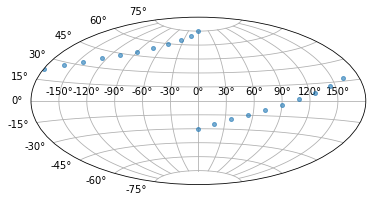

In [5]:
# data
ra = np.linspace(0, 360, 21) * u.degree
dec = np.linspace(-30, 75, 21) * u.degree
c = SkyCoord(ra=ra, dec=dec)

# convert RA and DEC to radian; shift range of RA to [-pi, pi]
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

fig1, ax1 = no_shifting(ra_rad, dec_rad)
plt.show()

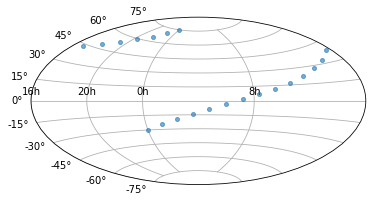

In [6]:
central_longitude = 60*u.degree
fig2, ax2 = shifting(c, central_longitude)
plt.show()